In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis

In [52]:
df = pd.read_excel("Customer Churn Dataset.xlsx")
pd.set_option("display.max_columns", None)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0,0,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,0,0,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,3,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,0,0,Yes


In [53]:
df.shape

(7043, 23)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [55]:
# Remove any leading or trailing spaces from all column names in the DataFrame
df.columns = df.columns.str.strip()

In [56]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'numAdminTickets',
       'numTechTickets', 'Churn'],
      dtype='object')

In [57]:
# Replacing blank values with 0 because tenure is 0 and no total charges are recorded.
df["TotalCharges"] = df["TotalCharges"].replace(" ", "0")
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [59]:
# checking null values 
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
numAdminTickets     0
numTechTickets      0
Churn               0
dtype: int64

In [60]:
df.duplicated().sum()

0

In [61]:
# Check for duplicate customerID values — 
# since customerID should be unique for every customer.
df["customerID"].duplicated().sum()

0

In [62]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304,0.515689,0.419566
std,0.368612,24.559481,30.090047,2266.794470,1.275299,1.250117
min,0.000000,0.000000,18.250000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,35.500000,398.550000,0.000000,0.000000
50%,0.000000,29.000000,70.350000,1394.550000,0.000000,0.000000
75%,0.000000,55.000000,89.850000,3786.600000,0.000000,0.000000
max,1.000000,72.000000,118.750000,8684.800000,5.000000,9.000000


In [63]:
print("kurtosis of tenure:",kurtosis(df["tenure"]))
print("kurtosis of MonthlyCharges:",kurtosis(df["MonthlyCharges"])) 
print("kurtosis of TotalCharges:",kurtosis(df["TotalCharges"]))

kurtosis of tenure: -1.3872386910324277
kurtosis of MonthlyCharges: -1.2572191009381857
kurtosis of TotalCharges: -0.22926935367162837


**tenure**
- Since mean > median, the distribution is right-skewed (positive skewness).

- Kurtosis is less than 0, indicating a platykurtic distribution — flatter peak and wider spread.

- 📌 Insight: Some customers have very long tenure, pulling the mean upward. Many customers drop off early, indicating retention challenges.

- 
**2. Monthly Charges**

- Since mean < median, this variable is left-skewed (negative skewness).

- Kurtosis is also negative, suggesting a platykurtic shape — less peaked, more spread.

- 📌 Insight: A few customers have low monthly charges, pulling the mean down. Most users pay moderate to high charges.

**3. Total Charges**

- With mean > median, this is another right-skewed distribution.

- Negative kurtosis points to a platykurtic shape — flatter than normal.

- 📌 Insight: High-value customers (long tenure with high charges) stretch the average upwards. These customers are vital to the business.




Overall Summary:

The dataset shows asymmetrical distributions across all major numeric features.

All three variables are platykurtic, showing less peaked, more spread out distributions.

These patterns help identify:

At-risk customers with short tenure or low charges.

High-value customers with long tenure and high total charges.



# tenure

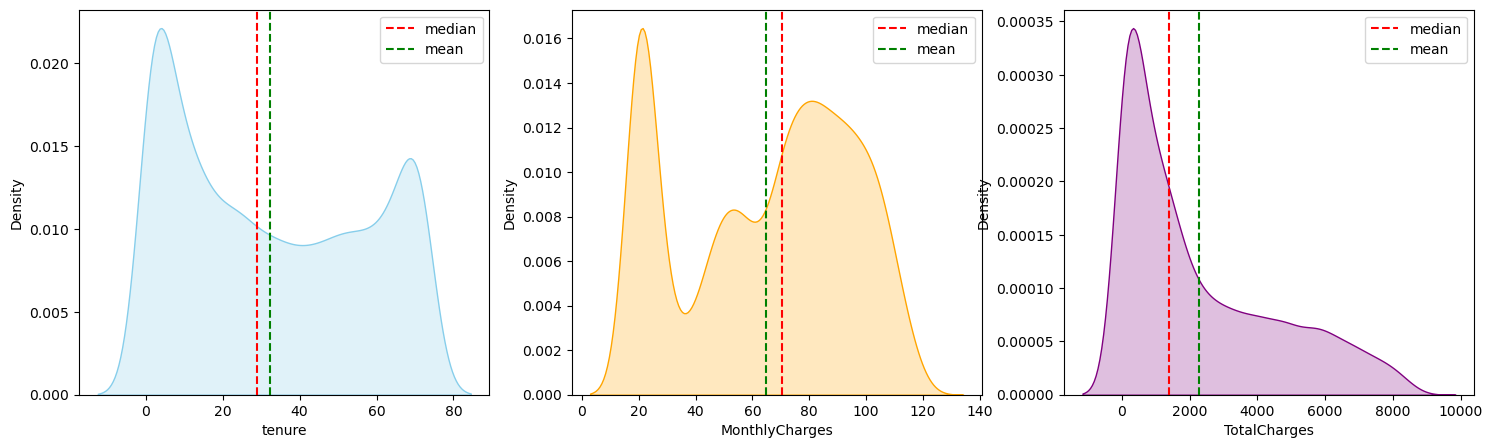

In [64]:
# tenure
fig, axes = plt.subplots(1,3, figsize = (18,5))

sns.kdeplot(x = "tenure",data=df, fill = True,color = "skyblue", ax = axes[0] )

axes[0].axvline(np.median(df["tenure"]), color = "r", linestyle="--", label = "median" )
axes[0].axvline(np.mean(df["tenure"]),   color = "g",  linestyle = "--", label = "mean",)
axes[0].legend(loc='upper right')

# monthlycharges
sns.kdeplot(x = "MonthlyCharges", fill = True,color = "orange", data=df, ax = axes[1])

axes[1].axvline(np.median(df["MonthlyCharges"]), color = "r", linestyle="--", label = "median" )
axes[1].axvline(np.mean(df["MonthlyCharges"]), color = "g",linestyle="--", label = "mean")
axes[1].legend(loc='upper right')

# total charges
sns.kdeplot(x = "TotalCharges", fill = True,color = "purple", data=df, ax = axes[2])

axes[2].axvline(np.median(df["TotalCharges"]), color = "r",linestyle="--", label = "median")
axes[2].axvline(np.mean(df["TotalCharges"]),   color = "g",linestyle="--", label = "mean")
axes[2].legend(loc='upper right')

plt.show()


# SeniorCitizen

In [65]:
df["SeniorCitizen"].unique()

array([0, 1], dtype=int64)

In [66]:
def convert(value):
    if value == 1:
        return "Yes"
    else:
        return "No"

df["SeniorCitizen"] = df["SeniorCitizen"].apply(convert) 

In [67]:
df["SeniorCitizen"].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
# converted 0 and 1 values of senior citizen to yes and no to make it easier to understand

# Churm

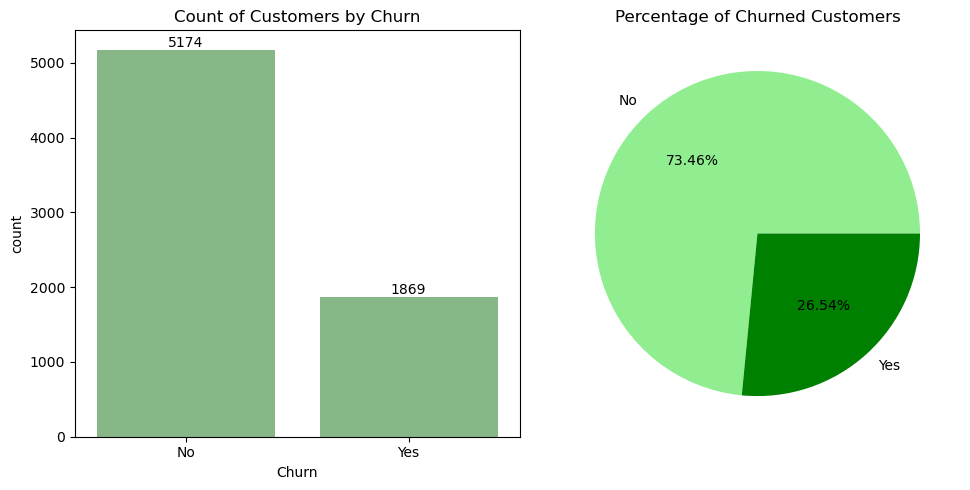

In [68]:

# Prepare grouped data
ag = df.groupby("Churn").agg({"Churn": "count"})

# Set up subplot
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Countplot (Bar)
ax1 = sns.countplot(x="Churn", data=df, color="green", alpha=0.5, ax=axes[0])
ax1.set_title("Count of Customers by Churn")
ax1.bar_label(ax1.containers[0])

# Pie chart (manual plot on axes[1])
axes[1].pie(ag["Churn"],labels=ag.index, autopct="%1.2f%%",  colors=["lightgreen", "green"])
axes[1].set_title("Percentage of Churned Customers", fontsize=12)

# Show combined plot
plt.tight_layout()
plt.show()


From the pie chart, we observe that 26.54% of customers have churned. Let's now explore the potential reasons behind this churn.

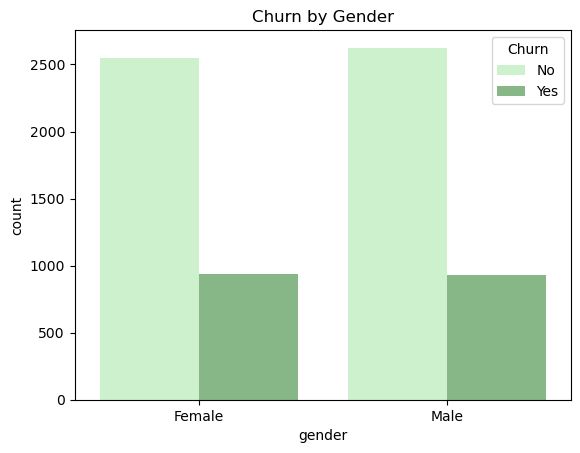

In [69]:
sns.countplot(x="gender", data=df, hue="Churn", palette=["lightgreen","green"], alpha = 0.5)

plt.title("Churn by Gender")
plt.show()


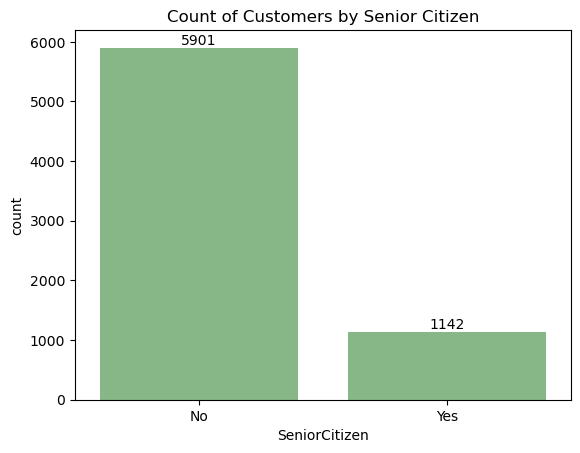

In [70]:
ax = sns.countplot(x = "SeniorCitizen", data = df, color = "g", alpha = 0.5)
plt.title("Count of Customers by Senior Citizen")

ax.bar_label(ax.containers[0])
plt.show()

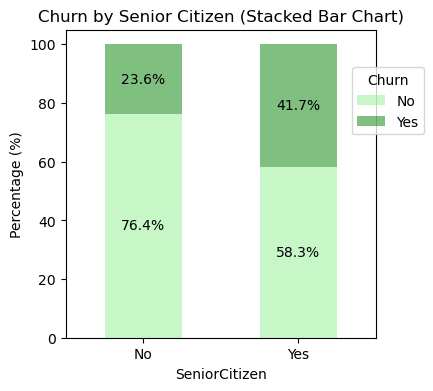

In [71]:
total_counts = df.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True).unstack() * 100

# Plot
fig, ax = plt.subplots(figsize=(4, 4))  # Adjust figsize for better visualization

# Plot the bars
total_counts.plot(kind='bar', stacked=True, ax=ax, color=['lightgreen', 'green'], alpha = 0.5)  # Customize colors if desired

# Add percentage labels on the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2, y + height / 2, f'{height:.1f}%', ha='center', va='center')

plt.title('Churn by Senior Citizen (Stacked Bar Chart)')
plt.xlabel('SeniorCitizen')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)
plt.legend(title='Churn', bbox_to_anchor = (0.9,0.9))  # Customize legend location

plt.show()

#comparative a greater pecentage of people in senior citizen category have churned

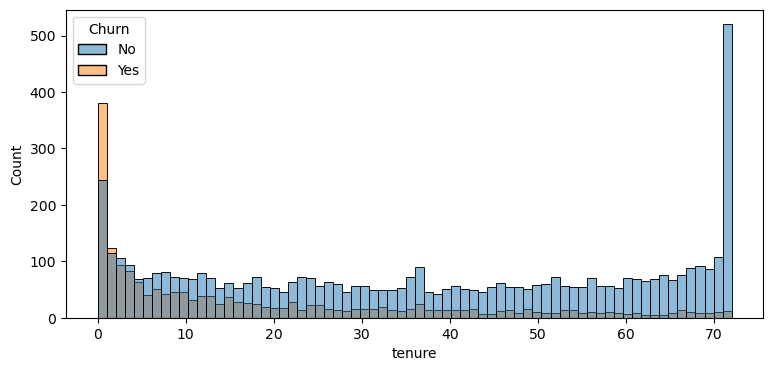

In [72]:
plt.figure(figsize = (9,4))
sns.histplot(x = "tenure", data = df, bins = 70, hue = "Churn" )
plt.show()

most of churned customers left within their first year.

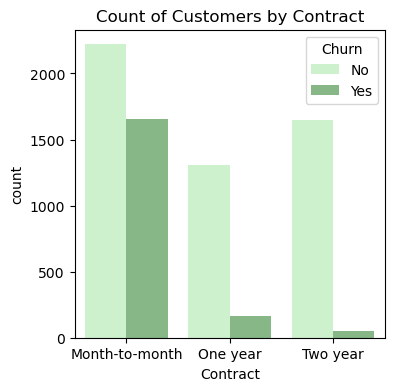

In [73]:
fig, ax = plt.subplots(figsize=(4, 4))  # Adjust figsize for better visualization

sns.countplot(x = "Contract", data = df, hue="Churn", palette=['lightgreen', 'green'], alpha = 0.5)
plt.title("Count of Customers by Contract")

plt.show()

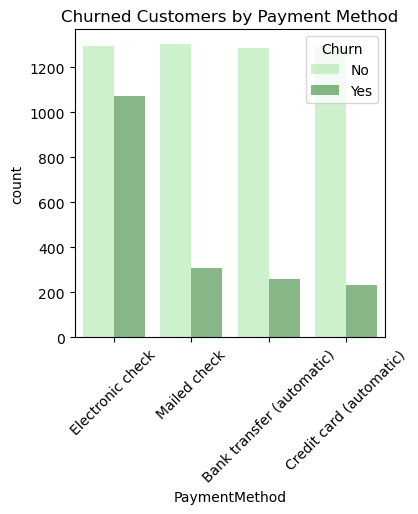

In [74]:
fig, ax = plt.subplots(figsize=(4, 4))  # Adjust figsize for better visualization
sns.countplot(x = "PaymentMethod", data = df, hue = "Churn",palette=['lightgreen', 'green'], alpha = 0.5)
plt.title("Churned Customers by Payment Method")

plt.xticks(rotation = 45)
plt.show()

#customer is likely to churn when he is using electronic check as a payment method and where on short-term contract(month-to-month). 

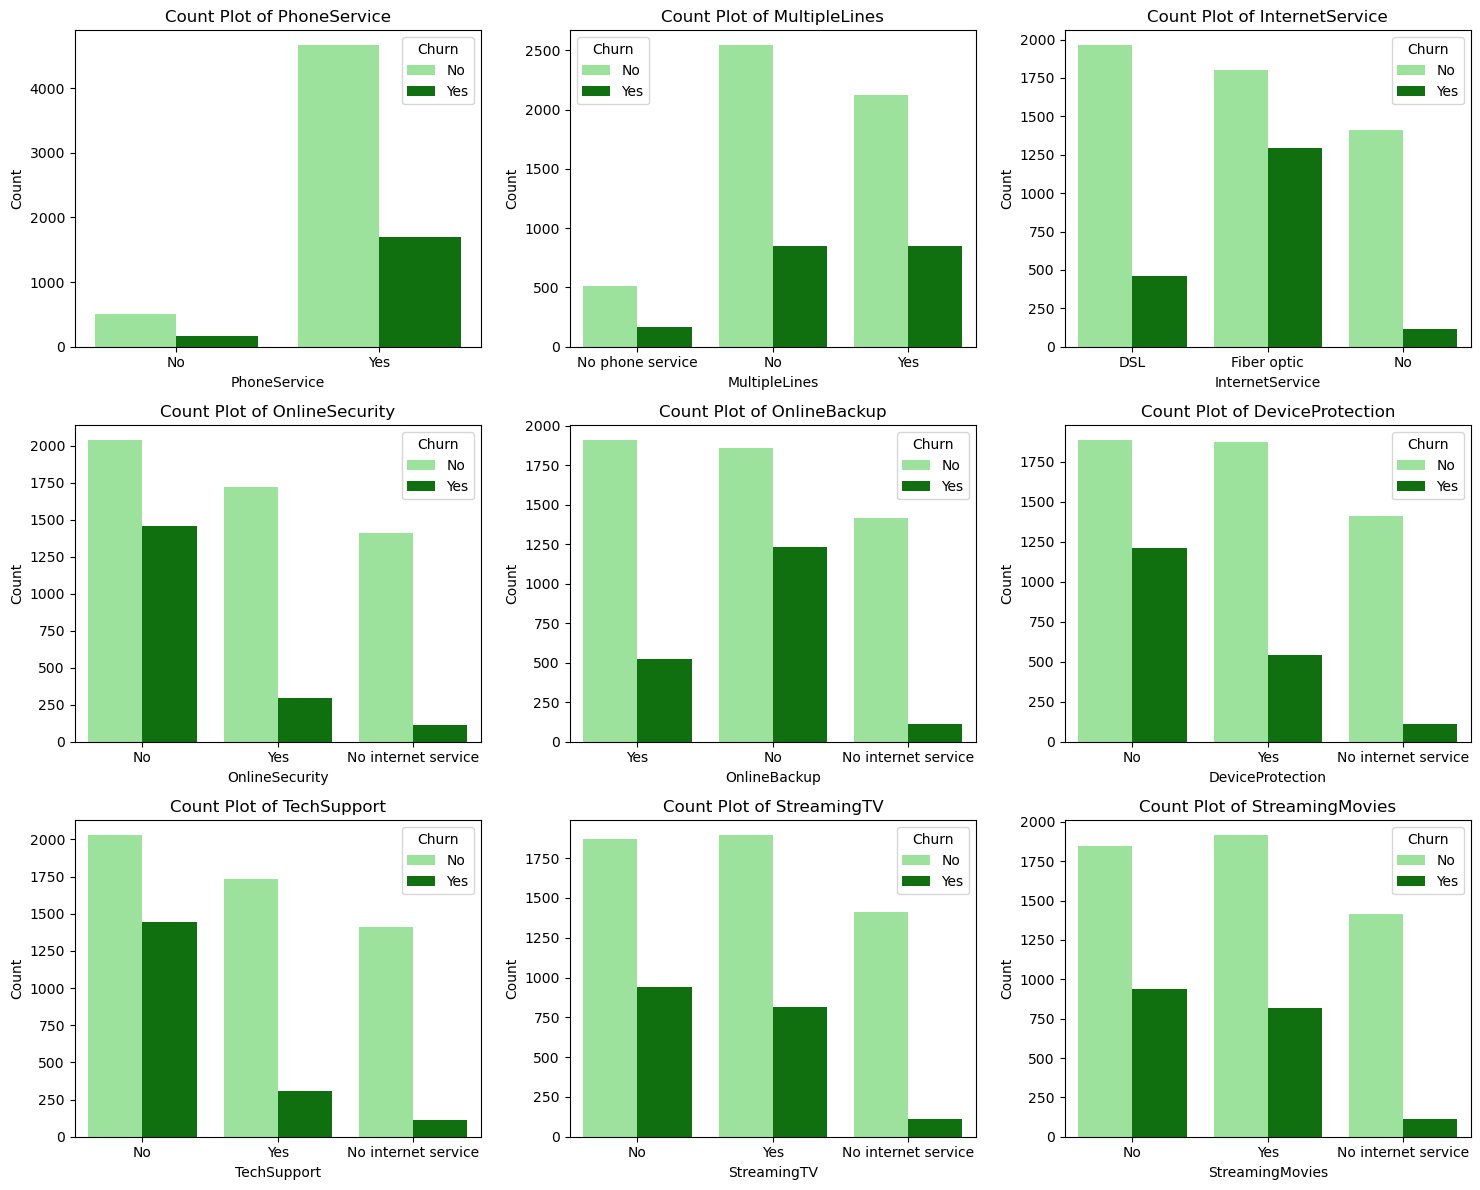

In [75]:
columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
           'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

n_cols = 3
n_rows = (len(columns) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten()

# Set your desired colors for Churn = No / Yes
churn_palette = ["lightgreen", "green"]

for i, col in enumerate(columns):
    sns.countplot(x=col, data=df, ax=axes[i], hue=df["Churn"], palette=churn_palette)
    axes[i].set_title(f'Count Plot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

# Remove empty plots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


#The majority of customers who do not churn tend to have services like PhoneService, InternetService (particularly DSL), and OnlineSecurity enabled. For services like OnlineBackup, TechSupport, and StreamingTV, churn rates are noticeably higher when these services are not used or are unavailable. 